In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def run_query_from_csv(filename, filter_condition=None):
    # Load data from CSV file into a pandas DataFrame
    data = pd.read_csv(filename)
    
    # Apply filter if provided
    if filter_condition:
        data = data.query(filter_condition)
    
    return data

In [6]:
# Load patients data
subject_id = 16705931
patients = run_query_from_csv('./core_samples/patients_sample.csv', f'subject_id == {subject_id}')
patients['anchor_year'] = patients['anchor_year']
display(patients)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod


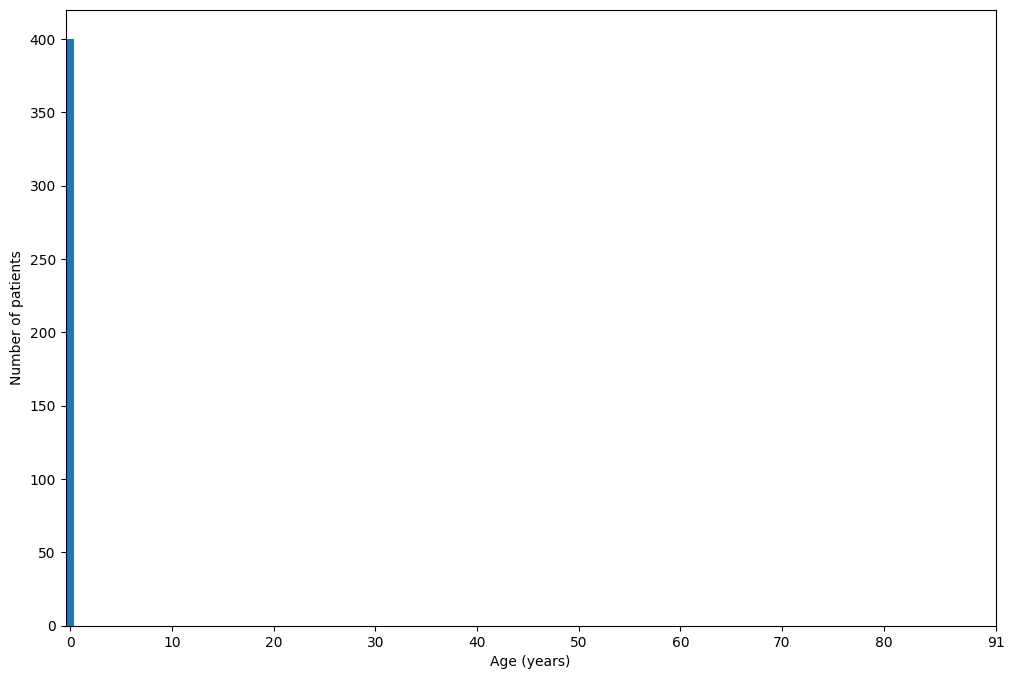

In [12]:
# Plot anchor_age histogram
age = run_query_from_csv('./core_samples/patients_sample.csv')
age_grouped = age.groupby('anchor_age').size().reset_index(name='n')
plt.figure(figsize=[12, 8])
plt.bar(age_grouped['anchor_age'], age_grouped['n'])
plt.xticks([x for x in range(0, 90, 10)] + [91])
plt.ylabel('Number of patients')
plt.xlabel('Age (years)')
plt.show()

In [8]:
# Load admissions for subject
admissions = run_query_from_csv('./core_samples/admissions_sample.csv', f'subject_id == {subject_id}')
display(admissions)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
6,16705931,20580522,2174-10-24 11:30:00,2174-10-24 18:45:00,NaN,DIRECT OBSERVATION,PHYSICIAN REFERRAL,NaN,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0


In [ ]:
# Plot hospitalizations by admission_location
admissions_all = run_query_from_csv('./core_samples/admissions_sample.csv')
admission_locations = admissions_all.groupby('admission_location').size().reset_index(name='n')
admission_locations['%'] = admission_locations['n'] / admission_locations['n'].sum() * 100.0

plt.figure(figsize=[8, 16])
plt.barh(admission_locations['admission_location'], admission_locations['n'])
plt.xlabel('Number of hospitalizations')
plt.xticks(rotation=45)
plt.show()